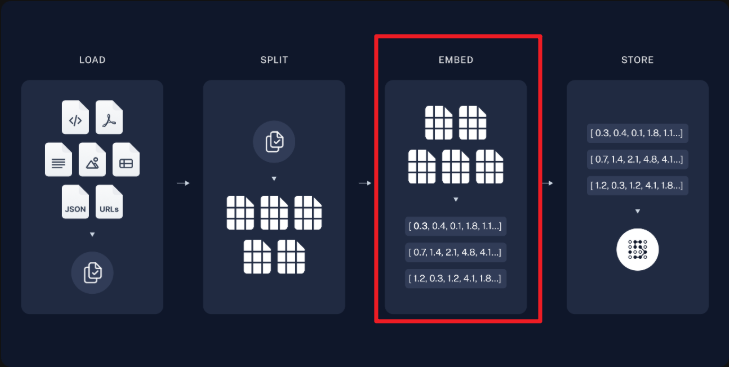

*임베딩*   
 - 자연어를 기계가 이해하도록 숫자로 변환 하는 것것
 - 유사도 측정, 감정 분석, 문서 분류 시 활용


In [2]:
# API 키를 환경변수로 관리하기 위한 설정 파일
from dotenv import load_dotenv

# API 키 정보 로드
load_dotenv()


True

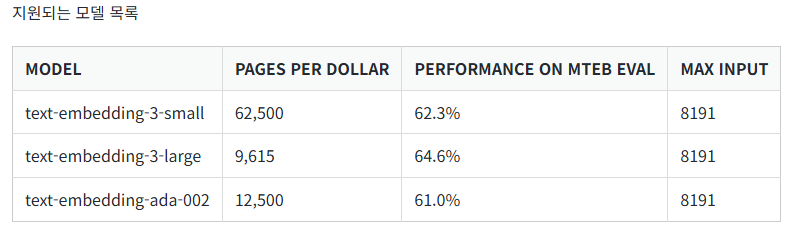   

Pages per Dollar : 1달라 대비 처리가능한 페이지 수   
Perfomance on MTEB Eval : 모델의 성능


- large 는 3072 차원 
- small 은 1536 차원


차원이 높을수록록
 - 더 많은 정보 포함 가능, 문장 간 미묘한 의미 차이까지 구분
 - 계산량, 리소스가 더 많이 듬듬

In [ ]:
#from langchain_openai import OpenAIEmbeddings

#yong_emb2= OpenAIEmbeddings(model="text-embedding-ada-002")

In [ ]:
from langchain_openai import OpenAIEmbeddings

yong_emb= OpenAIEmbeddings(model="text-embedding-3-small")

In [ ]:
#샘플데이터터
text = "임베딩 테스트를 하기 위한 샘플 문장입니다."

쿼리 임베딩(embed_query)
- 텍스트를 벡터로 변환하는 함수

In [60]:
query_result = yong_emb.embed_query(text)

In [ ]:
#query_result2 = yong_emb2.embed_query(text)
#len(query_result2)

1536

In [80]:
query_result[0:-1]

[-0.007747666910290718,
 0.03676600381731987,
 0.019548965618014336,
 -0.0197015218436718,
 0.017206139862537384,
 -0.00840147864073515,
 -0.011539774015545845,
 0.0007532453746534884,
 0.02804851531982422,
 -0.04090680927038193,
 0.013414033688604832,
 0.055835507810115814,
 -0.002671092515811324,
 0.02051878534257412,
 -0.01246600691229105,
 -0.03702752664685249,
 -0.018404794856905937,
 -0.007268205285072327,
 0.015419055707752705,
 0.019505377858877182,
 0.0156587865203619,
 -0.002051333663985133,
 -0.0006245262338779867,
 0.012215378694236279,
 -0.0008138591656461358,
 -0.05322026088833809,
 0.0038847303949296474,
 0.012890984304249287,
 0.04594115912914276,
 -0.03210214897990227,
 -0.005590088665485382,
 -0.01832851767539978,
 0.022926991805434227,
 -0.02645757421851158,
 0.05378689616918564,
 0.029421519488096237,
 -0.02909461408853531,
 -0.009540200233459473,
 0.003699483582749963,
 0.006859573069959879,
 -0.0009044393082149327,
 -0.015942104160785675,
 0.022556498646736145,
 0

In [68]:
len(query_result)

1536

Document 임베딩
- ~~문서를 임베딩~~

In [ ]:
#text2 = "임베딩 테스트를 하기 위한 샘플 문장입니다222222222222."

In [ ]:
doc_result =  yong_emb.embed_documents(
    [text]
)

In [88]:
doc_result[0][:5]


[-0.007747666910290718,
 0.03676600381731987,
 0.019548965618014336,
 -0.0197015218436718,
 0.017206139862537384]

차원 지정 & 조정
- 반환되는 임베딩의 크기를 지정

In [ ]:
len(doc_result[0])   #embedding-3-small 버전의 경우 기본적으로 1536차원 반환

1536

In [ ]:
yong_emb_1024 = OpenAIEmbeddings(model='text-embedding-3-small', dimensions=1024)

In [ ]:
len(yong_emb_1024.embed_documents([text])[0])

1024

In [10]:
embeddings_1600 = OpenAIEmbeddings(model="text-embedding-3-small", dimensions=1600)
result_query2 = embeddings_1600.embed_query(text)
len(result_query2)

BadRequestError: Error code: 400 - {'error': {'message': "Invalid value for 'dimensions' = 1600. Must be less than or equal to 1536.", 'type': 'invalid_request_error', 'param': None, 'code': None}}

유사도 계산

In [ ]:
sentence1 = "안녕하세요? 반갑습니다."
sentence2 = "안녕하세요? 반갑습니다!"
sentence3 = "안녕하세요? 만나서 반가워요."
sentence4 = "Hi, nice to meet you."
sentence5 = "I like to eat apples. "


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

sentences = [sentence1, sentence2, sentence3, sentence4, sentence5]
embedded_sentences = yong_emb_1024.embed_documents(sentences)

In [ ]:
def similarity(a,b):
    return cosine_similarity([a],[b])[0][0]

In [ ]:
for i, sentence in enumerate(embedded_sentences):
    for j, other_sentence in enumerate(embedded_sentences):
        if i < j :
            print(
                    f"[유사도 {similarity(sentence, other_sentence):.4f}] {sentences[i]} \t <=====> \t {sentences[j]}"
            )

[유사도 0.9645] 안녕하세요? 반갑습니다. 	 <=====> 	 안녕하세요? 반갑습니다!
[유사도 0.8373] 안녕하세요? 반갑습니다. 	 <=====> 	 안녕하세요? 만나서 반가워요.
[유사도 0.5043] 안녕하세요? 반갑습니다. 	 <=====> 	 Hi, nice to meet you.
[유사도 0.1369] 안녕하세요? 반갑습니다. 	 <=====> 	 I like to eat apples. 
[유사도 0.8139] 안녕하세요? 반갑습니다! 	 <=====> 	 안녕하세요? 만나서 반가워요.
[유사도 0.4791] 안녕하세요? 반갑습니다! 	 <=====> 	 Hi, nice to meet you.
[유사도 0.1302] 안녕하세요? 반갑습니다! 	 <=====> 	 I like to eat apples. 
[유사도 0.5129] 안녕하세요? 만나서 반가워요. 	 <=====> 	 Hi, nice to meet you.
[유사도 0.1444] 안녕하세요? 만나서 반가워요. 	 <=====> 	 I like to eat apples. 
[유사도 0.2268] Hi, nice to meet you. 	 <=====> 	 I like to eat apples. 


**2**


캐시 임베딩(CacheBackedEmbeddings)
- 임베딩 간 재계산을 피하기 위해 저장되거나 일시적으로 개시 가능,cachebackembeddings를 사용하여 수행   
   


LocalFileStore(영구보관)
- 임베딩 결과를 로컬 파일로 저장

- 디스크 기반이라 프로세스를 껐다 켜도 캐시가 유지됨

- 파일 경로 기반으로 저장 ("./cache_dir" 등)

In [ ]:
from langchain.storage import LocalFileStore          # 캐시 담을 storage 생성
from langchain_openai import OpenAIEmbeddings
from langchain.embeddings import CacheBackedEmbeddings

embedding = OpenAIEmbeddings()

store = LocalFileStore("./embedding_cache")

cached_embedder = CacheBackedEmbeddings.from_bytes_store(       #cachedBackendEmbeddings클래스의 from_bytes_store 매서드 사용
    underlying_embeddings=embedding,
    document_embedding_cache=store,
    namespace=embedding.model,   #기본 임베딩과 저장소를 사용하여 캐시 지원 임베딩을 생성
)

In [ ]:
list(store.yield_keys())  # store에서 키들을 순차적으로 가져옵니다

[]

In [ ]:
import faiss
from langchain_community.vectorstores import FAISS
from langchain.document_loaders import TextLoader
from langchain_text_splitters import CharacterTextSplitter

loader = TextLoader("./data/appendix-keywords.txt",encoding="utf-8")
raw_documents = loader.load()

text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)

documents = text_splitter.split_documents(raw_documents)

In [ ]:
# 코드 실행 시간을 측정합니다.
%time db=FAISS.from_documents(documents, cached_embedder)  # 문서로부터 FAISS 데이터베이스 생성


CPU times: total: 46.9 ms
Wall time: 6.62 s


In [ ]:
%time db2= FAISS.from_documents(documents, cached_embedder) 

CPU times: total: 0 ns
Wall time: 7.06 ms


In [ ]:
list(store.yield_keys())  # 해당 key들은 고유값으로 추후 검색, 삭제, 목록확인, 업데이트 시에 사용

['text-embedding-ada-0020fd71f95-1342-512d-9d5b-3e3ab3c6bbe0',
 'text-embedding-ada-0022112b0ec-6ade-59c9-b09c-755b33c3d32c',
 'text-embedding-ada-00241e7391b-b68f-5e9f-bb07-3609bb83c3e2',
 'text-embedding-ada-0027494a7c8-3399-52a1-85ef-f4d0a563d31f',
 'text-embedding-ada-00274ae75af-9058-555e-aefa-082f0b4e0560',
 'text-embedding-ada-0029db9e1cd-62d8-50fc-94f4-24bef3cacaf5',
 'text-embedding-ada-002cc824f84-d691-544f-9d9c-ca7e45470bb2']

InmemoryByteStore
- RAM에 저장, 즉 세션 종료 시 사라짐

- 빠르고 가벼움

In [33]:
from langchain.embeddings import CacheBackedEmbeddings
from langchain.storage import InMemoryByteStore

#embedding = OpenAIEmbeddings()

store = InMemoryByteStore()

# 캐시 지원 임베딩 생성
cached_embedder = CacheBackedEmbeddings.from_bytes_store(
    embedding, store, namespace=embedding.model
)

NameError: name 'embedding' is not defined

**3**

허깅페이스 임베딩
 - 앞선 Openai 임베딩은 고성느이지만, 유료
 - 허깅페이스 임베딩은 오픈소스 NLP모델(무료)을 이용, 모델 종류가 다양



In [2]:
from dotenv import load_dotenv

load_dotenv()

True

In [3]:
import os
import warnings

warnings.filterwarnings("ignore")

In [4]:
#샘플데이터터

from langchain_core.documents import Document

texts = [
    "안녕, 만나서 반가워.",
    "LangChain simplifies the process of building applications with large language models",
    "랭체인 한국어 튜토리얼은 LangChain의 공식 문서, cookbook 및 다양한 실용 예제를 바탕으로 하여 사용자가 LangChain을 더 쉽고 효과적으로 활용할 수 있도록 구성되어 있습니다. ",
    "LangChain은 초거대 언어모델로 애플리케이션을 구축하는 과정을 단순화합니다.",
    "Retrieval-Augmented Generation (RAG) is an effective technique for improving AI responses.",
]


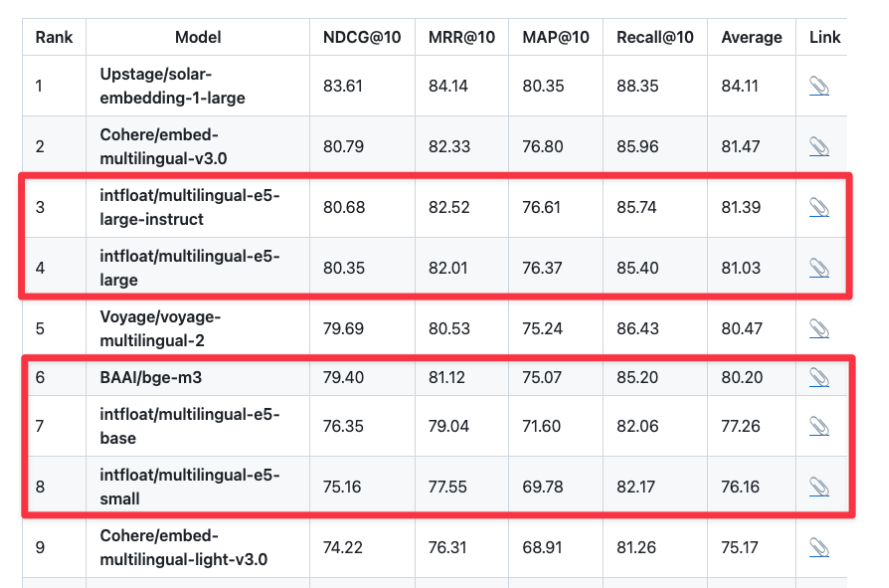

huggingFace endpoint Embedding

In [ ]:
from langchain_huggingface.embeddings import HuggingFaceEndpointEmbeddings

model_name = "intfloat/multilingual-e5-large-instruct"

hf_embeddings = HuggingFaceEndpointEmbeddings(
    model=model_name,
    task="feature-extraction",
    #huggingfacehub_api_token=os.environ["HUGGINGFACEHUB_API_TOKEN"],
    
)


In [6]:
%%time
# Document Embedding 수행
embedded_documents = hf_embeddings.embed_documents(texts)

CPU times: total: 46.9 ms
Wall time: 32.5 s


In [7]:
print("[HuggingFace Endpoint Embedding]")
print(f"Model: \t\t{model_name}")
print(f"Dimension: \t{len(embedded_documents[0])}")

[HuggingFace Endpoint Embedding]
Model: 		intfloat/multilingual-e5-large-instruct
Dimension: 	1024


In [8]:
# query Embedding 수행
embedded_query = hf_embeddings.embed_query("LangChain 에 대해서 알려주세요.")

In [9]:
len(embedded_query)

1024

query 와 embedding_document 간의 유사도 계산

In [ ]:
import numpy as np           # python에서 고속 수치 계산을 위한 라이브러리 , 벡터-행렬 연산에 사용용

# 질문(embedded_query): LangChain 에 대해서 알려주세요.
np.array(embedded_query) @ np.array(embedded_documents).T     # @ 연산자로 벡터 내적 또는 행렬 곱 가능


# 질문 벡터와 여러 문서 벡터들 간의 내적, 유사도 계산

array([0.84186316, 0.8650232 , 0.86470298, 0.89564878, 0.76847333])

In [11]:
sorted_idx = (np.array(embedded_query) @ np.array(embedded_documents).T).argsort()[::-1]
sorted_idx


array([3, 1, 2, 0, 4], dtype=int64)

In [12]:
print("[Query] LangChain 에 대해서 알려주세요.\n====================================")
for i, idx in enumerate(sorted_idx):
    print(f"[{i}] {texts[idx]}")
    print()


[Query] LangChain 에 대해서 알려주세요.
[0] LangChain은 초거대 언어모델로 애플리케이션을 구축하는 과정을 단순화합니다.

[1] LangChain simplifies the process of building applications with large language models

[2] 랭체인 한국어 튜토리얼은 LangChain의 공식 문서, cookbook 및 다양한 실용 예제를 바탕으로 하여 사용자가 LangChain을 더 쉽고 효과적으로 활용할 수 있도록 구성되어 있습니다. 

[3] 안녕, 만나서 반가워.

[4] Retrieval-Augmented Generation (RAG) is an effective technique for improving AI responses.



**bge-m3**

In [31]:
from langchain_huggingface import HuggingFaceEmbeddings

model_name = "BAAI/bge-m3"
model_kwargs = {"device": "cuda"}
encode_kwargs = {"normalize_embeddings": True}
hf_embeddings = HuggingFaceEmbeddings(
    model_name=model_name, model_kwargs=model_kwargs, encode_kwargs=encode_kwargs
)

AssertionError: Torch not compiled with CUDA enabled

In [32]:
import torch
print(torch.cuda.is_available())

False


In [18]:
from langchain_huggingface import HuggingFaceEmbeddings

model_name = "BAAI/bge-m3"
model_kwargs = {"device": "cpu"}
encode_kwargs = {"normalize_embeddings": True}
hf_embeddings = HuggingFaceEmbeddings(
    model_name=model_name, model_kwargs=model_kwargs, encode_kwargs=encode_kwargs
)

In [19]:
%time
# Document
embedded_documents = hf_embeddings.embed_documents(texts)


CPU times: total: 0 ns
Wall time: 0 ns


In [20]:
print(f"Model: \t\t{model_name}")
print(f"Dimension: \t{len(embedded_documents[0])}")


Model: 		BAAI/bge-m3
Dimension: 	1024


FlagEmbedding 
 - BAAI 팀이 만든 BGE 계열 모델(BGE-m3)에 추가기능을 붙인 형태
 - dense vector
 - lexical weights
 - multi vector



In [21]:
# FlagEmbedding 설치
!pip install -qU FlagEmbedding



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from FlagEmbedding import BGEM3FlagModel

model_name = "BAAI/bge-m3"
bge_embeddings = BGEM3FlagModel(
    model_name, use_fp16=True
) 

bge_embedded = bge_embeddings.encode(
    texts,
    batch_size=12,
    max_length=8192,  
)["dense_vecs"]       


Fetching 30 files:   0%|          | 0/30 [00:00<?, ?it/s]

You're using a XLMRobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


In [23]:
bge_embedded.shape

(5, 1024)

In [24]:
print(f"Model: \t\t{model_name}")
print(f"Dimension: \t{len(embedded_documents[0])}")


Model: 		BAAI/bge-m3
Dimension: 	1024


dense vector
 - 일반적인 의미 기반 임베딩

In [ ]:
from FlagEmbedding import BGEM3FlagModel

bge_flagmodel = BGEM3FlagModel(
    "BAAI/bge-m3", use_fp16=True
)  
bge_encoded = bge_flagmodel.encode(texts, return_dense=True) #일반적인 임베딩


Fetching 30 files:   0%|          | 0/30 [00:00<?, ?it/s]

You're using a XLMRobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


In [26]:
# 결과 출력(행, 열)
bge_encoded["dense_vecs"].shape


(5, 1024)

Sparse Embedding (Lexical Weight)   
- 단어의 중요도를 고려하여 임베딩
- 단순한 bag-of-words보다 어휘 유사도까지 녹일 수 있음


In [ ]:
bge_flagmodel = BGEM3FlagModel(
    "BAAI/bge-m3", use_fp16=True
)  
bge_encoded = bge_flagmodel.encode(texts, return_sparse=True)


Fetching 30 files:   0%|          | 0/30 [00:00<?, ?it/s]

You're using a XLMRobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


In [28]:
lexical_scores1 = bge_flagmodel.compute_lexical_matching_score(
    bge_encoded["lexical_weights"][0], bge_encoded["lexical_weights"][0]
)
lexical_scores2 = bge_flagmodel.compute_lexical_matching_score(
    bge_encoded["lexical_weights"][0], bge_encoded["lexical_weights"][1]
)
# 0 <-> 0
print(lexical_scores1)
# 0 <-> 1
print(lexical_scores2)


0.3015604689717293
0


Multi-Vector (ColBERT)   
- 문서와 쿼리를 여러 개의 벡터로 표현하는 multi-vector 접근법을 사용합니다.

작동 방식

1. 문서의 각 토큰에 대해 별도의 벡터를 생성합니다. 즉, 하나의 문서는 여러 개의 벡터로 표현됩니다.
2. 쿼리도 마찬가지로 각 토큰에 대해 별도의 벡터를 생성합니다.
3. 검색 시, 쿼리의 각 토큰 벡터와 문서의 모든 토큰 벡터 사이의 유사도를 계산합니다.
4. 이 유사도들을 종합하여 최종 검색 점수를 계산합니다.   
장점 - 토큰 수준의 세밀한 매칭이 가능합니다. - 문맥을 고려한 임베딩을 생성할 수 있습니다. - 긴 문서에 대해서도 효과적으로 작동합니다.

In [29]:
bge_flagmodel = BGEM3FlagModel(
    "BAAI/bge-m3", use_fp16=True
)  # use_fp16을 True로 설정하면 약간의 성능 저하와 함께 계산 속도가 빨라집니다.
bge_encoded = bge_flagmodel.encode(texts, return_colbert_vecs=True)


Fetching 30 files:   0%|          | 0/30 [00:00<?, ?it/s]

You're using a XLMRobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


In [30]:
colbert_scores1 = bge_flagmodel.colbert_score(
    bge_encoded["colbert_vecs"][0], bge_encoded["colbert_vecs"][0]
)
colbert_scores2 = bge_flagmodel.colbert_score(
    bge_encoded["colbert_vecs"][0], bge_encoded["colbert_vecs"][1]
)
# 0 <-> 0
print(colbert_scores1)
# 0 <-> 1
print(colbert_scores2)


tensor(1.)
tensor(0.3748)
